Данные заранее разделены на train и test выборки, мы начнем работать только с train, а итоговую оценку модели дадим на тестовых данных.

# Описание данных

| Переменная                           | Описание |
|--------------------------------------|----------|
| policy_id                            | Уникальный идентификатор страхователя |
| policy_tenure                        | Срок действия страхового полиса |
| age_of_car                           | Нормализованный возраст автомобиля в годах |
| age_of_policyholder                  | Нормализованный возраст страхователя в годах |
| area_cluster                         | Кластер области страхователя |
| population_density                    | Плотность населения города (город страхователя) |
| make                                 | Закодированный производитель/компания автомобиля |
| segment                              | Сегмент автомобиля (A/ B1/ B2/ C1/ C2) |
| model                                | Закодированное название модели автомобиля |
| fuel_type                            | Тип топлива, используемого в автомобиле |
| max_torque                           | Максимальный крутящий момент автомобиля (Нм@об/мин) |
| max_power                            | Максимальная мощность автомобиля (л.с.@об/мин) |
| engine_type                          | Тип двигателя, используемого в автомобиле |
| airbags                              | Количество подушек безопасности в автомобиле |
| is_esc                               | Булево значение: есть ли система электронной стабилизации (ESC) в автомобиле |
| is_adjustable_steering               | Булево значение: регулируется ли рулевое колесо автомобиля |
| is_tpms                              | Булево значение: есть ли система контроля давления в шинах (TPMS) |
| is_parking_sensors                   | Булево значение: есть ли парковочные датчики в автомобиле |
| is_parking_camera                    | Булево значение: есть ли камера заднего вида в автомобиле |
| rear_brakes_type                     | Тип тормозов на задних колесах автомобиля |
| displacement                         | Рабочий объем двигателя автомобиля (см³) |
| cylinder                             | Количество цилиндров в двигателе автомобиля |
| transmission_type                     | Тип трансмиссии автомобиля |
| gear_box                             | Количество передач в автомобиле |
| steering_type                        | Тип рулевого управления автомобиля |
| turning_radius                       | Радиус разворота автомобиля (в метрах) |
| length                               | Длина автомобиля (в миллиметрах) |
| width                                | Ширина автомобиля (в миллиметрах) |
| height                               | Высота автомобиля (в миллиметрах) |
| gross_weight                         | Максимально допустимый вес загруженного автомобиля, включая пассажиров, груз и оборудование (кг) |
| is_front_fog_lights                  | Булево значение: есть ли передние противотуманные фары |
| is_rear_window_wiper                 | Булево значение: есть ли задний стеклоочиститель |
| is_rear_window_washer                | Булево значение: есть ли омыватель заднего стекла |
| is_rear_window_defogger              | Булево значение: есть ли обогрев заднего стекла |
| is_brake_assist                      | Булево значение: есть ли система помощи при торможении |
| is_power_door_lock                   | Булево значение: есть ли автоматический замок дверей |
| is_central_locking                   | Булево значение: есть ли центральный замок |
| is_power_steering                    | Булево значение: есть ли усилитель рулевого управления |
| is_driver_seat_height_adjustable      | Булево значение: регулируется ли высота сиденья водителя |
| is_day_night_rear_view_mirror         | Булево значение: есть ли зеркало заднего вида с функцией "день-ночь" |
| is_ecw                               | Булево значение: есть ли предупреждение о проверке двигателя (ECW) |
| is_speed_alert                       | Булево значение: есть ли система оповещения о превышении скорости |
| ncap_rating                          | Рейтинг безопасности, присвоенный NCAP (из 5) |
| is_claim                             | Итог: Булево значение, указывающее, подал ли страхователь заявку на выплату в течение следующих 6 месяцев |


is_claim - таргетная переменная

# Импортируем библиотеки

In [1]:
import pandas as pd #библиотека для работы с данными
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

# Посмотрим и импортируем данные

In [2]:
df_train = pd.read_csv('train.csv') # загружаем данные в датафрейм

In [3]:
df_train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [4]:
df_train.shape

(58592, 44)

In [5]:
df_train.isnull().sum() #смотрим пропущенные значения

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
df_train.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

# EDA (разведочный анализ данных)

In [7]:
print(sum(df_train['is_claim'] == 1), '- positive class,')
print(sum(df_train['is_claim'] == 0), '- negative class')

3748 - positive class,
54844 - negative class


In [8]:
object_cols = df_train.loc[:, df_train.dtypes=='object'].columns
print(object_cols)

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [9]:
df_train_copy = df_train.drop(columns='is_claim')
num_cols = df_train_copy.loc[:, df_train_copy.dtypes!='object'].columns
print(num_cols)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric, C=0.006):
        """
        Инициализация трансформера.
        """
        self.categorical = categorical
        self.numeric = numeric
        self.C = C
        
        self.mapping = {}
        
    
    def fit(self, X, y):
        """
        Среднее значение таргета для колонки
        """
        X_fit = X.copy()
        y_fit = y.copy()

        for col in self.categorical:
            mean_value = y_fit.groupby(X_fit[col]).mean()

            noise = self.C * np.random.normal(0, 1, size=len(mean_value))
            self.mapping[col] = mean_value + noise

        return self
        
    def transform(self, df):
        """
        Трансформирует категориальные признаки с использованием среднего таргета и шума,
        а также добавляет One-Hot Encoding для категориальных признаков с уникальными значениями <= 5.
        """
        
        df_transformed = df.copy()
        temp = pd.DataFrame()
        
        # Преобразуем числовые столбцы
        for col in self.numeric:
            temp[col] = df_transformed[col]
        
        # Преобразуем категориальные столбцы
        for col in self.categorical:
            unique_vals = df_transformed[col].nunique()
            
            if unique_vals > 5:
                # Для категориальных признаков с более чем 5 уникальными значениями - применяем Target Encoding с шумом
                if col in self.mapping:
                    temp[col] = df_transformed[col].map(self.mapping[col]).fillna(0)
                else:
                    temp[col] = 0
            else:
                # Для категориальных признаков с уникальными значениями <= 5 применяем One-Hot Encoding
                temp = pd.concat([temp, pd.get_dummies(df_transformed[col], prefix=col, drop_first=True)], axis=1).astype('float')

        return temp

С добавлением шума мы улучшили обобщающую способность модели и предотвращает переобучение.

- Обобщающая способность - характеристика модели, когда она одинаково хорошо работает на разных данных.

- Переобучение - модель хорошо предсказывает на train и плохо на test (сильно подстраивается под тестовые данные).

In [11]:
df_train_X = df_train.drop(columns=['is_claim'])
df_train_y = df_train['is_claim']

transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(df_train_X, df_train_y)

train = transformer.transform(df_train_X)

train.head(10)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,4.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,4.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,4.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,4.80,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,5.00,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,1.018709,0.07,0.519231,13051.0,3.0,6.0,1493.0,4.0,6.0,5.20,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,0.097992,0.16,0.403846,6112.0,4.0,2.0,1497.0,4.0,5.0,5.00,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
7,0.509085,0.14,0.423077,8794.0,1.0,2.0,1197.0,4.0,5.0,4.80,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.282394,0.07,0.298077,6112.0,3.0,6.0,1493.0,4.0,6.0,5.20,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,0.566255,0.04,0.442308,17804.0,1.0,6.0,1197.0,4.0,5.0,4.85,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
train.drop(columns=['policy_id'], inplace=True)

In [13]:
train = pd.concat([df_train[['policy_id']], train], axis=1)
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,ID00001,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,ID00002,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,ID00003,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,ID00004,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,ID00005,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,8794.0,2.0,2.0,999.0,3.0,5.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
58588,ID58589,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58589,ID58590,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58590,ID58591,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
print(train.shape)

(58592, 45)


In [15]:
df = pd.concat([train, df_train_y], axis=1)

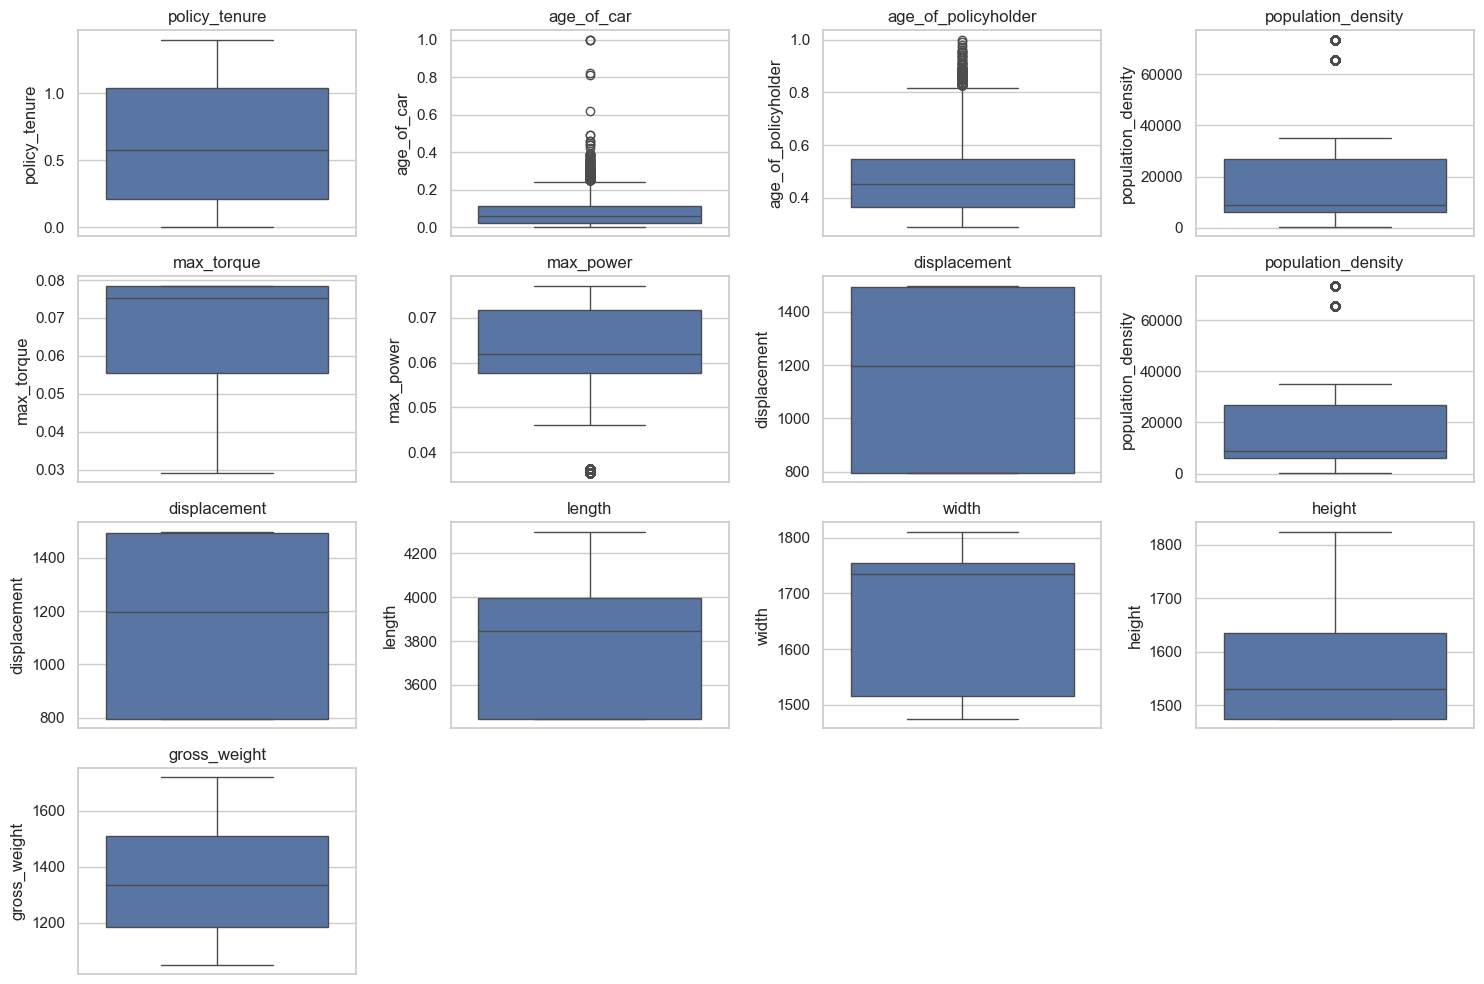

In [16]:
filtered_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density', 'max_torque', 'max_power','displacement', 
                    'population_density','displacement', 'length', 'width', 'height', 'gross_weight']

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_columns, 1):
    plt.subplot((len(filtered_columns) + 3) // 4, 4, i)  # Динамическое число строк
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 #интерквартальный размах
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))] #фильтруем значения, которые не являются выбросами
    return df

for col in filtered_columns:
    df = remove_outliers(df, col)
    
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,...,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,is_claim
0,ID00001,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,ID00002,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,ID00003,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,ID00004,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
5,ID00006,1.018709,0.07,0.519231,13051.0,3.0,6.0,1493.0,4.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58586,ID58587,1.240162,0.07,0.461538,4076.0,3.0,6.0,1493.0,4.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
58588,ID58589,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
58589,ID58590,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
58590,ID58591,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


df.columns

Наличие систем безопасности

In [18]:
safety_features = [
    'airbags', 'is_esc_Yes', 'is_brake_assist_Yes', 'is_tpms_Yes',
    'is_parking_sensors_Yes', 'is_parking_camera_Yes', 'is_speed_alert_Yes'
]
df['safety_features_count'] = df[safety_features].sum(axis=1)

df.drop(columns=['airbags', 'is_esc_Yes', 'is_brake_assist_Yes', 'is_tpms_Yes',
    'is_parking_sensors_Yes', 'is_parking_camera_Yes', 'is_speed_alert_Yes'],
       inplace=True)

Комфорт

In [19]:
comfort_features = [
    'is_adjustable_steering_Yes', 'is_power_steering_Yes', 'is_driver_seat_height_adjustable_Yes',
    'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes', 'is_rear_window_washer_Yes',
    'is_rear_window_defogger_Yes', 'is_central_locking_Yes'
]
df['comfort_features_count'] = df[comfort_features].sum(axis=1)

df.drop(columns=[ 'is_adjustable_steering_Yes', 'is_power_steering_Yes', 'is_driver_seat_height_adjustable_Yes',
    'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes', 'is_rear_window_washer_Yes',
    'is_rear_window_defogger_Yes', 'is_central_locking_Yes'],
       inplace=True)

Объем кузова автомобиля

In [20]:
df['volume'] = df['length'] * df['width'] * df['height'] * 1e-9
df.drop(columns=['length', 'width', 'height'], inplace=True)

Мощность на вес

In [21]:
df['power_to_weight'] = df['max_power'] / df['gross_weight']
df.drop(columns=['max_power', 'gross_weight'], inplace=True)

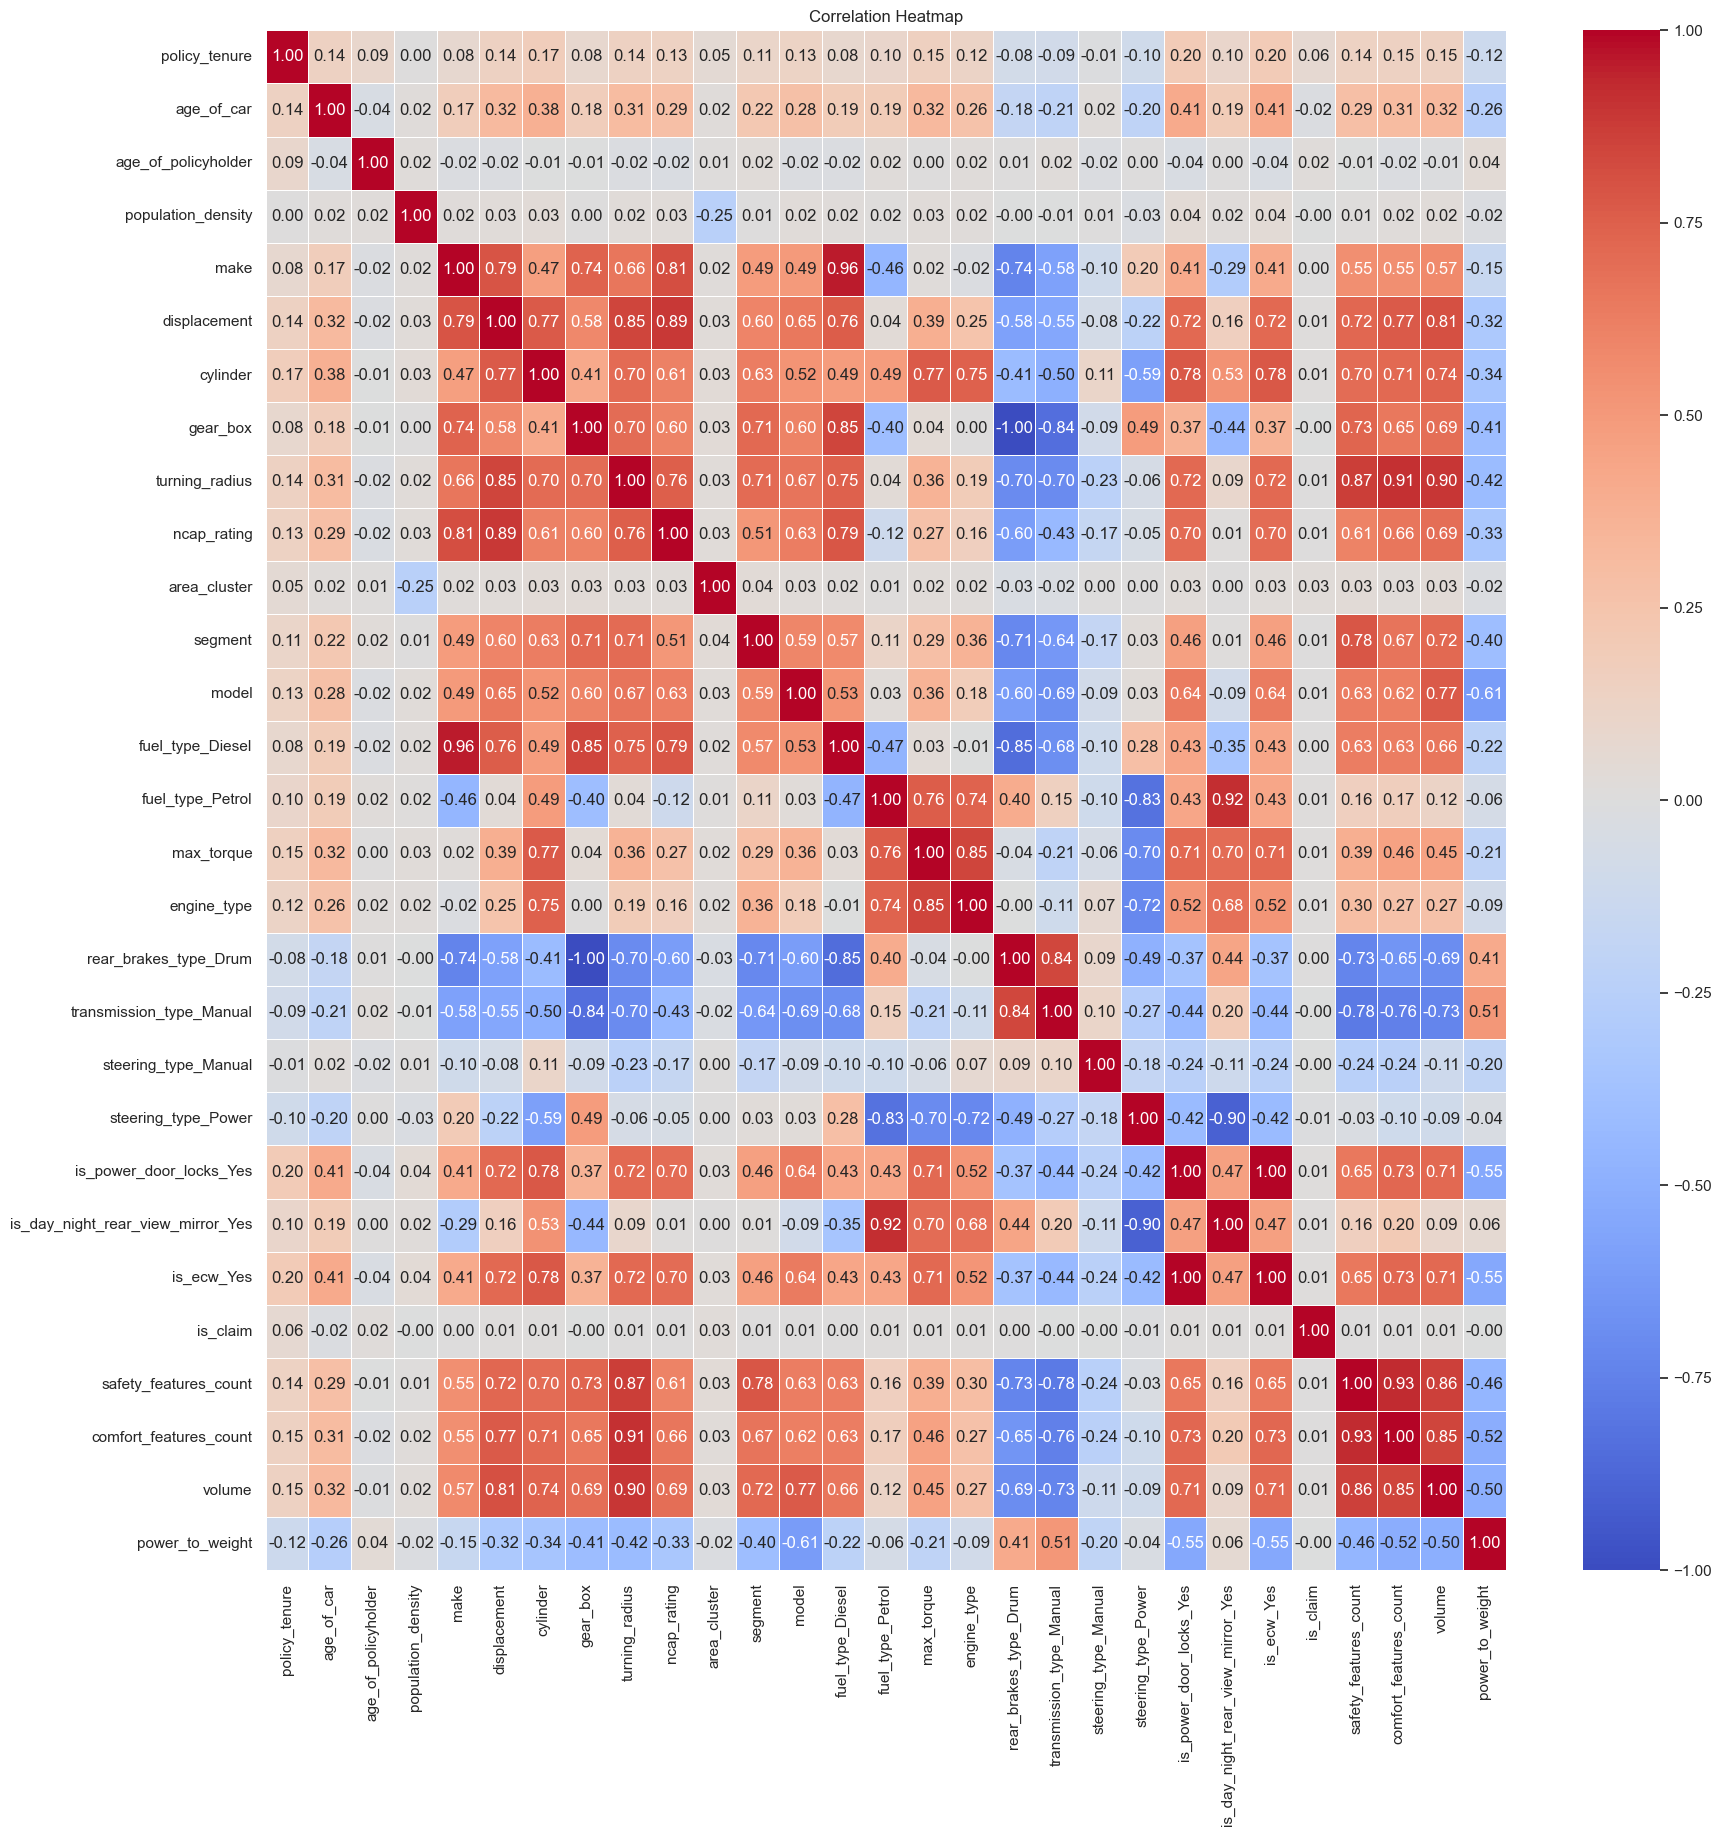

In [22]:
df_copy = df.drop(columns='policy_id')
corr_matrix = df_copy.corr(method='kendall')

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
corr_matrix = df_copy.corr(method='kendall').abs()

# Выбираем верхний треугольник корреляционной матрицы для того чтобы не учитывать корреляцию признака с самим собой
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)
upper_triangle_corr = pd.DataFrame(upper_triangle * corr_matrix, 
                                   columns=corr_matrix.columns, 
                                   index=corr_matrix.index)

# Находим признаки с корреляцией выше 0.95
to_drop = [column for column in upper_triangle_corr.columns 
           if any(upper_triangle_corr[column] > 0.95) and column not in ['is_claim', 'police_id']]

# Удаляем выбранные признаки
df = df.drop(columns=to_drop)

print(f"Удаленные признаки: {to_drop}")

Удаленные признаки: ['fuel_type_Diesel', 'rear_brakes_type_Drum', 'is_ecw_Yes']


In [24]:
keep_columns = ['is_claim', 'policy_id']

# Применяем VarianceThreshold только к остальным колонкам
df_to_check = df.drop(columns=keep_columns)

# Устанавливаем порог дисперсии
selector = VarianceThreshold(threshold=0.001)

# Применяем к данным
selector.fit(df_to_check)

# Получаем признаки, которые остались после удаления квазиконстантных
remaining_features = df_to_check.columns[selector.get_support()]

# Объединяем с колонками, которые нужно оставить в любом случае
final_columns = list(keep_columns) + list(remaining_features)

print(f"Оставшиеся признаки: {final_columns}")

Оставшиеся признаки: ['is_claim', 'policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'ncap_rating', 'fuel_type_Petrol', 'transmission_type_Manual', 'steering_type_Manual', 'steering_type_Power', 'is_power_door_locks_Yes', 'is_day_night_rear_view_mirror_Yes', 'safety_features_count', 'comfort_features_count', 'volume']


In [25]:
df = df[final_columns]
df

,is_claim,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,displacement,cylinder,gear_box,...,ncap_rating,fuel_type_Petrol,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_power_door_locks_Yes,is_day_night_rear_view_mirror_Yes,safety_features_count,comfort_features_count,volume
0,0,ID00001,0.515874,0.05,0.644231,4990.0,1.0,796.0,3.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,7.698283
1,0,ID00002,0.672619,0.02,0.375000,27003.0,1.0,796.0,3.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,7.698283
2,0,ID00003,0.841110,0.02,0.384615,4076.0,1.0,796.0,3.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,7.698283
3,0,ID00004,0.900277,0.11,0.432692,21622.0,1.0,1197.0,4.0,5.0,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0,6.0,10.500957
5,0,ID00006,1.018709,0.07,0.519231,13051.0,3.0,1493.0,4.0,6.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,8.0,12.584595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58586,0,ID58587,1.240162,0.07,0.461538,4076.0,3.0,1493.0,4.0,6.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,8.0,12.584595
58588,0,ID58589,1.199642,0.02,0.519231,7788.0,1.0,796.0,3.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,7.698283
58589,0,ID58590,1.162273,0.05,0.451923,34738.0,1.0,796.0,3.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,7.698283
58590,0,ID58591,1.236307,0.14,0.557692,8794.0,1.0,1197.0,4.0,5.0,...,2.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,10.206745


# Обучаем модели

In [26]:
y = df['is_claim']
X = df.drop(['is_claim', 'policy_id'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

param_grid = {
    "random_forest__max_depth": [10, 15, 20, 30],
    "random_forest__min_samples_split": [2, 5, 10],
    "random_forest__min_samples_leaf": [1, 3, 5]
}

RandomForest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(class_weight = 'balanced'))
])

search = GridSearchCV(RandomForest_pipe, param_grid)

search.fit(X_train, y_train)

print(f'Лучшая оценка на train CV score = {search.best_score_:.2f}')
print(f'Kучшие гиперпараметры модели: {search.best_params_}')

best_rf_model = search.best_estimator_
test_score = search.score(X_test, y_test)

print(f'Качество лучшей модели на тестовых данных: {test_score:.2f}')

Лучшая оценка на train CV score = 0.93
Kучшие гиперпараметры модели: {'random_forest__max_depth': 30, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2}
Качество лучшей модели на тестовых данных: 0.9311195007319516:.2f


In [ ]:
# Лучшая оценка на train CV score = 0.93
# Kучшие гиперпараметры модели: {'random_forest__max_depth': 30, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2}
# Качество лучшей модели на тестовых данных: 0.9311195007319516:.2f

In [30]:
from catboost import CatBoostClassifier

param_grid = {
    "catboost__depth": [6, 8, 10],  # Глубина деревьев
    "catboost__learning_rate": [0.01, 0.05, 0.1],  # Скорость обучения
    "catboost__l2_leaf_reg": [3, 5, 7],  # L2-регуляризация
    "catboost__border_count": [32, 64, 128],  # Количество бинов для числовых фичей
}

# Пайплайн с масштабированием числовых данных и CatBoost
CatBoost_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация числовых данных
    ('catboost', CatBoostClassifier(auto_class_weights='Balanced', silent=True))
])

# GridSearchCV для подбора гиперпараметров
search = GridSearchCV(CatBoost_pipe, param_grid, scoring="accuracy")
search.fit(X_train, y_train)

# Вывод лучших параметров
print(f'Лучшая оценка на train CV score = {search.best_score_:.2f}')
print(f'Лучшие гиперпараметры модели: {search.best_params_}')

best_catboost_model = search.best_estimator_
test_score = best_catboost_model.score(X_test, y_test)

print(f'Качество лучшей модели на тестовых данных: {test_score:.2f}')

Лучшая оценка на train CV score = 0.88
Лучшие гиперпараметры модели: {'catboost__border_count': 128, 'catboost__depth': 10, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Качество лучшей модели на тестовых данных: 0.86


In [ ]:
# Лучшая оценка на train CV score = 0.88
# Лучшие гиперпараметры модели: {'catboost__border_count': 128, 'catboost__depth': 10, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
# Качество лучшей модели на тестовых данных: 0.86